In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve

# Task 1

We want to investigate the behavior of the following time series: $x_{t+1} = f(x_t, a, b) = a * x_t + b * tanh(x_t)$

In [2]:
def f(x_t, a, b):
    return a * x_t + b * np.tanh(x_t)

In [3]:
def generate_TS(x_0, a, b, N = 1000):
    x = np.zeros(N)
    
    x[0] = x_0
    
    for i in range(1, N):
        x[i] = f(x[i-1], a, b)
        
    return x

## Task 1.1
First we want to find and classify the fixed points of this time series. We will achieve this by plotting the return map together with the bisectrix, which will reveal much about the dynamical behavior of our time series.

In [4]:
# Define a function that will plot the return map of our TS for given values a, b
def return_map(a, b):
    x_t = np.linspace(-100,100, 1000)

    plt.figure(figsize = (7,7))
    plt.title(f'The return map for parameters (a,b) = ({a},{b})')
    
    plt.plot(x_t, f(x_t, a, b), label = 'return map')
    plt.plot(x_t, x_t, '--', label = 'bisectrix')
    
    plt.legend()
    
    plt.xlabel('$x$')
    plt.ylabel(f'$f\ (x, a = {a}, b = {b})$')
    
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)

### Part I)

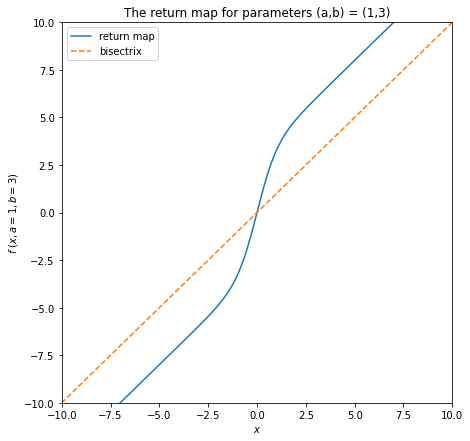

In [5]:
# Define parameter space
a, b = (1, 3)

# Plot the return map
return_map(a, b)

From the return map we find that there is one fixed point at x = 0. <br> 
This fixed point is unstable, as the return map has a slope whose absolute value is bigger then one at the intersection point with the bisectrix.

### Part II)

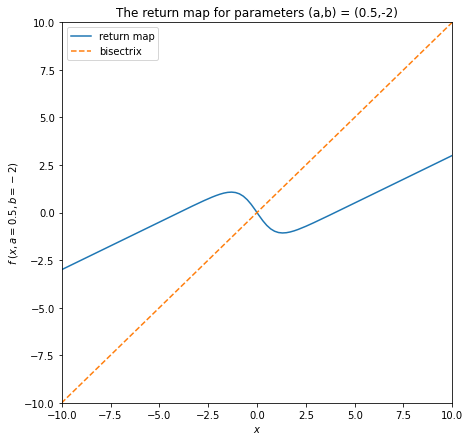

In [6]:
a, b = (0.5, -2)

return_map(a, b)

There is only one fixed point at x = 0. <br>
This fixed point appears to be unstable, because the return map has a slope whose absolute value is bigger then one at the intersection point with the bisectrix. <br>
Additionally there is a two cylce between {~1, ~-1}.

### Part III)

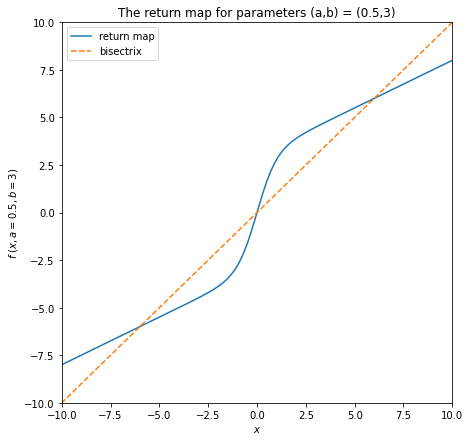

In [7]:
a, b = (0.5, 3)

return_map(a, b)

There are three fixes points ~-6, 0, ~6. <br>
The point x = 0 is unstable, the points ~-6 and ~6 are stable local attractors. The reasoning is again, that the absolutes of the slope at the fixed points is smaller (for stable points) / greater (for unstable points) then one.

### Part IV

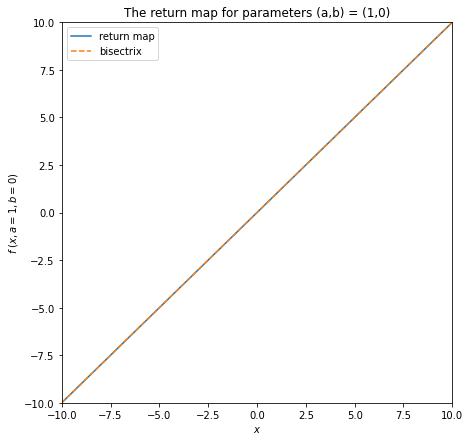

In [8]:
a, b = (1, 0)

return_map(a, b)

$\mathbb{R}$ is the set of all fixed points for this case, as can be easily seen from: $$x_{t+1} = f(x_t, 1, 0) = x_t$$ $$\iff$$ $$f(x^*, 1, 0) = x^*\ \ \ \forall x^* \in \mathbb{R}$$ $$\implies$$ $$x^*\ is\ a\ fixed\ point \ \ \ \forall x^* \in \mathbb{R}$$ <br>
These fixed points are marginally stable.

## Task 1.2
Next we will plot the trajectories of the time series for different starting values. <br>
Because I wanst sure what exactly "plot the trajectory of the system" means, I plotted both the time series against time and the return plot (overlayed on the return map).

In [9]:
# Define a function that will plot the trajectories of our TS for given values a, b
def trajectories(a, b):
    x_0s = [-10, -0.5, 0, 0.5, 10]
    
    fig, axs = plt.subplots(5,1, figsize = (7 , 14))
    fig.suptitle(f'Trajectory for different starting values and parameters (a,b) = ({a},{b})')
    fig.tight_layout()
    
    for i, x_0 in enumerate(x_0s):
        axs[i].scatter(range(30), generate_TS(x_0, a, b, 30), marker = 'x', label = f'$x_0 = {x_0}$')
        axs[i].set_ylabel('$x_t$')
        axs[i].legend()
    
    axs[-1].set_xlabel('t')
    
def trajectories_(a, b):
    x_0s = [-10, -0.5, 0, 0.5, 10]
    
    fig = plt.figure(figsize = (7, 7))
    plt.title(f'Trajectory in return plot for different starting values and parameters (a,b) = ({a},{b})')
    
    x_t = np.linspace(-100,100,1000)
    plt.plot(x_t, f(x_t, a, b), label = 'return map', alpha = 0.5)
    plt.plot(x_t, x_t, '--', label = 'bisectrix', alpha = 0.5)
    
    for i, x_0 in enumerate(x_0s):
        x = generate_TS(x_0, a, b, 10)
        plt.scatter(x[:-1], x[1:], marker = 'x', label = f'$x_0 = ${x_0}')
        
        for i in range(len(x)-2):
            plt.plot([x[i], x[i+1], x[i+1]], [x[i+1], x[i+1], x[i+2]], color = 'grey')
        
    plt.xlim(-20,20)
    plt.ylim(-20,20)
    
    plt.xlabel('$x_t$')
    plt.ylabel('$x_{t+1}$')
    
    plt.legend()

### Part I

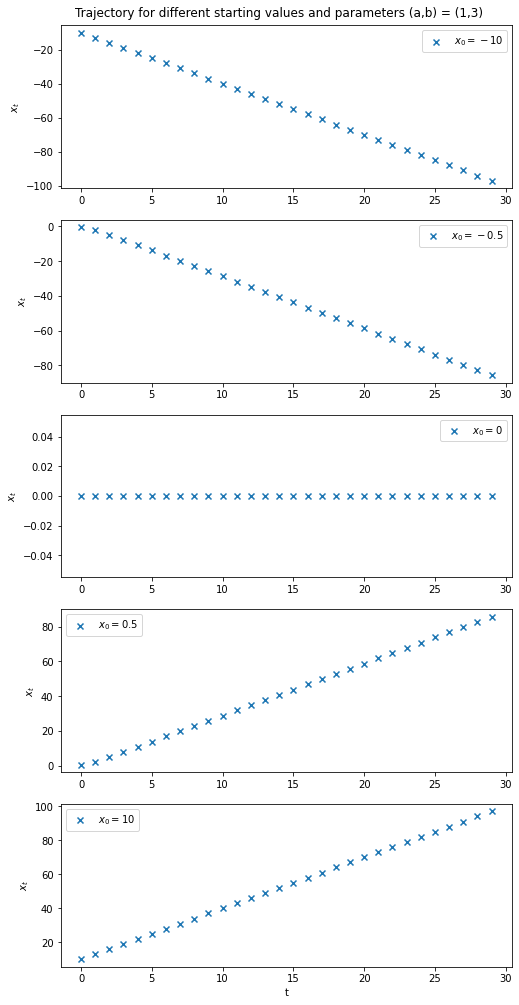

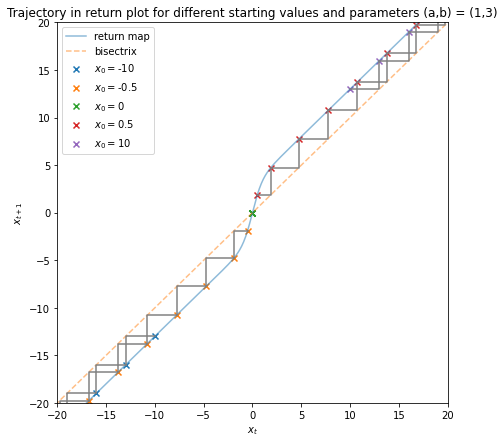

In [10]:
a, b = (1, 3)

trajectories(a, b)
trajectories_(a,b)

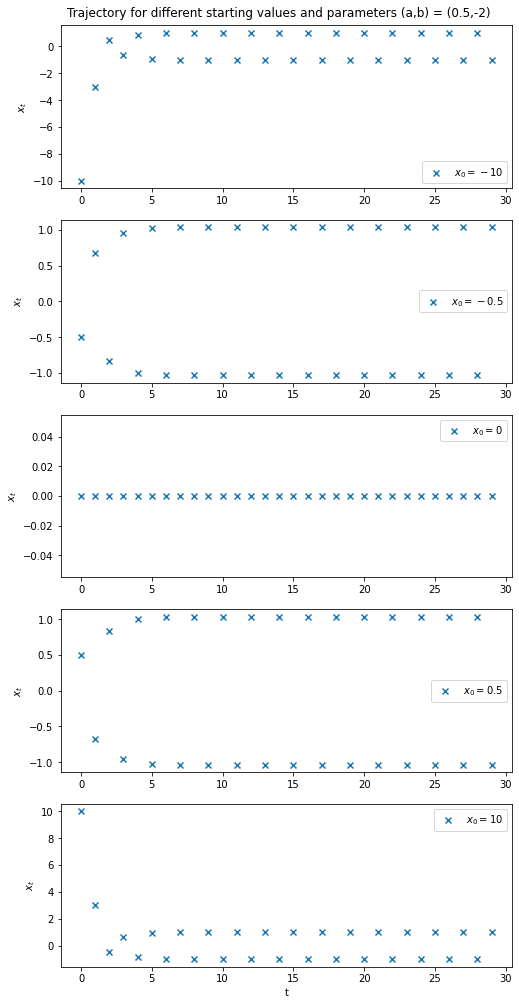

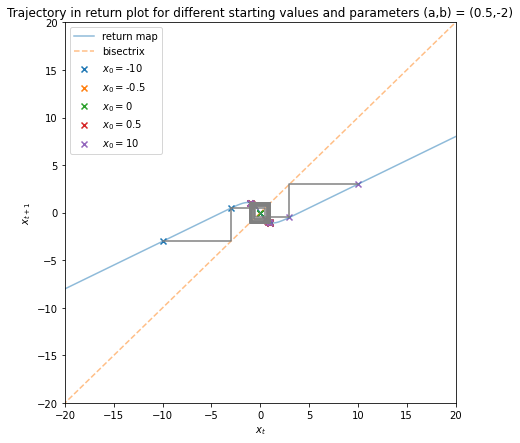

In [11]:
a, b = (0.5, -2)

trajectories(a, b)
trajectories_(a, b)

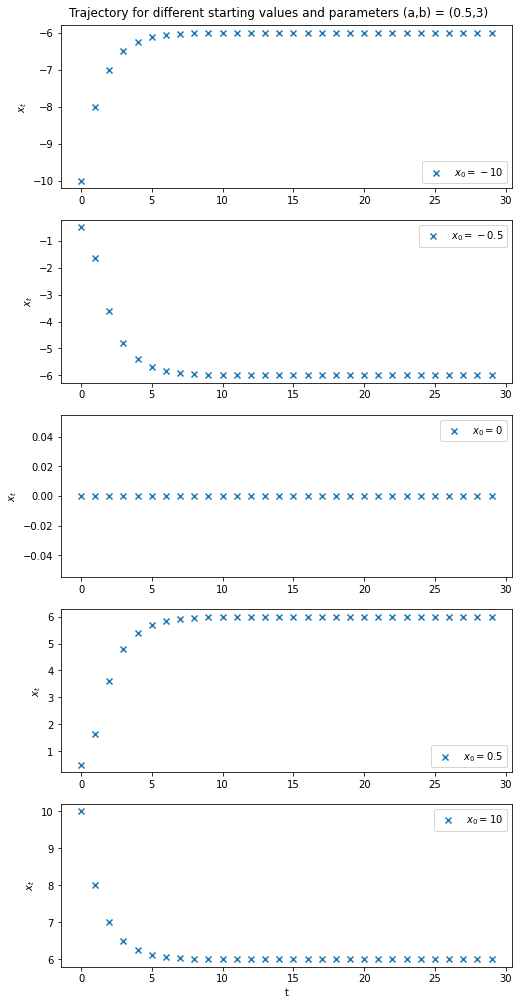

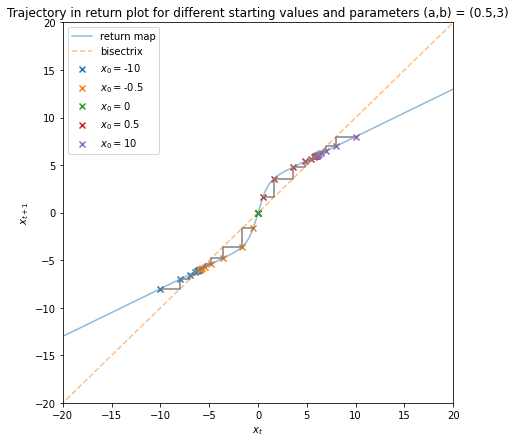

In [12]:
a, b = (0.5, 3)

trajectories(a, b)
trajectories_(a, b)

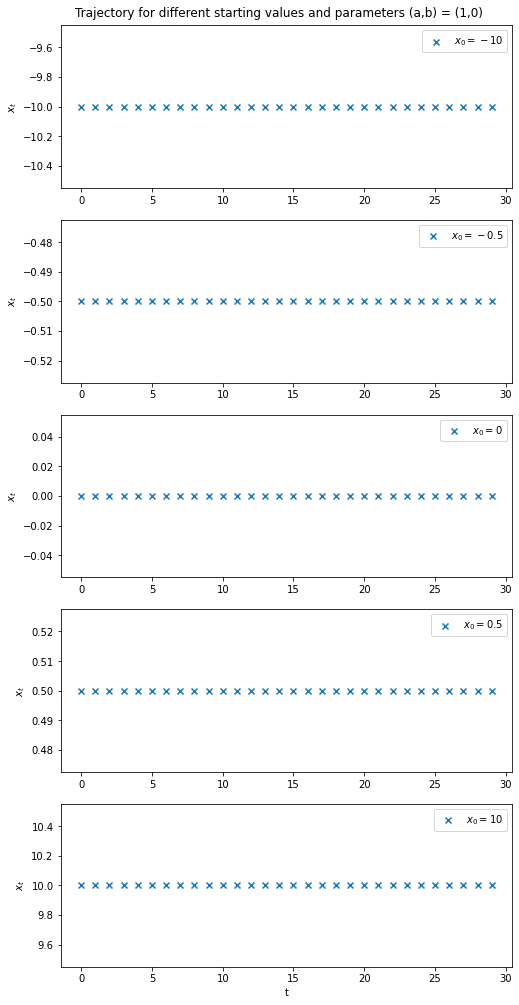

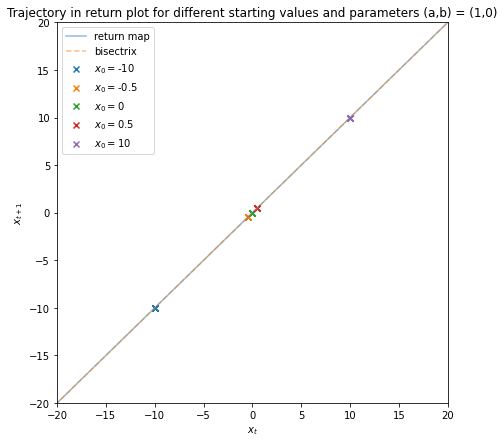

In [13]:
a, b = (1, 0)

trajectories(a, b)
trajectories_(a, b)

## Task 1.3

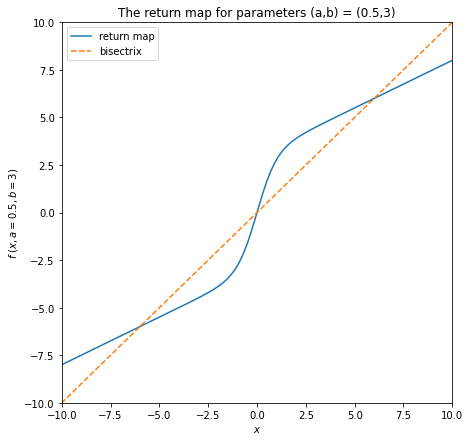

In [14]:
a,b = (0.5, 3)

return_map(a, b)

In [15]:
f_param = lambda x: f(x, a, b)

fix_point = lambda x: f_param(x) - x

fsolve(fix_point, 100)

for x_0 in [-10, -0.5, 0, 0.5, 10]:
    print(f'x_0={x_0:5g} , {fsolve(fix_point, x_0)}')

x_0=  -10 , [-5.99992626]
x_0= -0.5 , [0.]
x_0=    0 , [0.]
x_0=  0.5 , [0.]
x_0=   10 , [5.99992626]


Numerically we find the fix points we suspected before: ~-6, 0, ~6

To investigate their stability we will calculate the absolute of the derivative of f:
$$|f'(x, a, b)| = |\frac{df}{dx}| = |a + \frac{b}{cosh^2(x)}|$$
for this case:
$$|f'(x, 0.5, 3)| = |0.5 + \frac{3}{cosh^2(x)}|$$
Plugging in the fixed points we get:
$$|f'(-5.9999262, 0.5, 3)| = |0.5 + \frac{3}{cosh^2(-5.9999262)}| \sim 0.5 < 1 \implies stable$$
$$|f'(0, 0.5, 3)| = |0.5 + \frac{3}{cosh^2(0)}| = 3.5 > 1 \implies unstable$$
$$|f'(+5.9999262, 0.5, 3)| = |0.5 + \frac{3}{cosh^2(+5.9999262)}| \sim 0.5 < 1 \implies stable$$

# Task 2

In this task we struggled with pytorch quite a bit and werent able to finish. <br>
I suspect we made some small mistakes along the way, as this task really is just using the provided script... <br>
The mistakes should be in the train function we wrote, as soon as those mistakes are fixed, everything should work. <br>
The results i suspect are, that with lower learning rates the loss converges more slowly. For the very high learning rates it might not converge at all. <br>
The NN with more neurons will propably have a higher accuracy by the end and might take longer to train.

In [16]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

We will first use a RNN with 7 Neurons (N = 5):

In [17]:
def train(N, learning_rate, activation = 'tanh'):
    T = 10          # Length of time series
    Tinp = 3        # Time at which the input is presented
    Tout = [7]      # Time points at which the output is required
    Ntrial = 6000   # Number of trials
    alpha = 0.1     # learning rate
    batchsize = 5   # how many trials per training step?
    
    input1 = np.zeros([T,1,N])
    input2 = np.zeros([T,1,N])
    input1[Tinp,0,0] = 1   # Provide input to neuron 0
    input2[Tinp,0,1] = 1   # Provide input to neuron 1
    
    target1 = np.zeros([T,1,N])
    target2 = np.zeros([T,1,N])
    for t in Tout:
        target1[Tout,0,3] = 1
        target2[Tout,0,2] = 1
    inputs  = {0: input1, 1: input2}
    targets = {0: target1, 1: target2}
    
    losses = np.zeros(Ntrial)
    criterion = nn.MSELoss()
    
    net = nn.RNN(N, N, 1, nonlinearity=activation)
    
    for i in range(Ntrial):
        inpt    = torch.zeros(T,batchsize,N, dtype=torch.float)
        target  = torch.zeros(T,batchsize,N, dtype=torch.float)
        for n in range(batchsize):
            trial_type      = np.random.randint(0,2)
            inpt[:,n,:]     = torch.tensor(inputs[trial_type], dtype=torch.float).squeeze()
            target[:,n,:]   = torch.tensor(targets[trial_type], dtype=torch.float).squeeze()
        
        [outp, _] = net(inpt)
        
        loss = criterion(outp[Tout,:,2:4], target[Tout,:,2:4])
        losses[i] = loss
        
        net.zero_grad()
        
        loss.backward()
        
        optimizer = optim.SGD(net.parameters(), lr=learning_rate)
        optimizer.step()
        
    return net, inpt, losses

We will now train several RNN with seven neurons and different learning rates.


KeyboardInterrupt



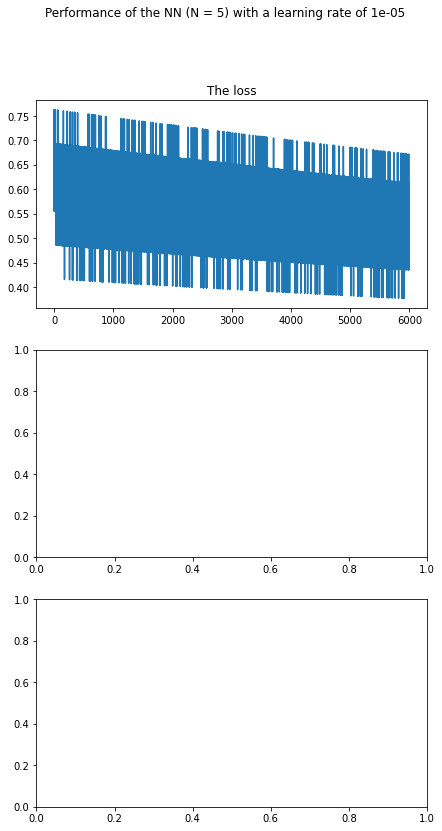

In [18]:
for learning_rate in [1e-5, 1e-3, 1e-2, 1]:
    net, inpt, losses = train(5, learning_rate)
    
    fig, axs = plt.subplots(3,1, figsize=(7,13))
    fig.suptitle(f'Performance of the NN (N = 5) with a learning rate of {learning_rate}')
    
    axs[0].plot(losses, label = f'learning rate: {learning_rate}')
    axs[0].set_title('The loss')
    
    [outp, _] = net(inpt)
    outp = outp.detach().numpy()
    x3 = np.squeeze(outp[:,0,2])
    x4 = np.squeeze(outp[:,0,3])
    
    axs[1].plot(range(T), x4)
    axs[1].plot(range(T), x3)

Next we will repeat this again but with a network with 10 neurons.

In [ ]:
for learning_rate in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]:
    net, losses = train(10, learning_rate)
    
    fig, axs = plt.subplots(3,1, figsize=(7,13))
    fig.suptitle(f'Performance of the NN (N = 10) with a learning rate of {learning_rate}')
    
    axs[0].plot(losses, label = f'learning rate: {learning_rate}')
    axs[0].set_title('The loss')
    
    [outp, _] = net(inpt)
    outp = outp.detach().numpy()
    x3 = np.squeeze(outp[:,0,2])
    x4 = np.squeeze(outp[:,0,3])
    
    axs[1].plot(range(T), x4)
    axs[1].plot(range(T), x3)

Lastly we want to change the activation function of our RNN.

In [ ]:
net, losses = train(net, learning_rate, 'relu')
    
fig, axs = plt.subplots(3,1, figsize=(7,13))
fig.suptitle(f'Performance of the NN (N = 10) with a learning rate of {learning_rate} and relu activation')
    
axs[0].plot(losses, label = f'learning rate: {learning_rate}')
axs[0].set_title('The loss')
    
[outp, _] = net(inpt)
outp = outp.detach().numpy()
x3 = np.squeeze(outp[:,0,2])
x4 = np.squeeze(outp[:,0,3])
    
axs[1].plot(range(T), x4)
axs[1].plot(range(T), x3)